# DonorsChoose


## Exploratry data analysis :


#### 1.1 Readning the data

In [1]:
import pandas as pd

In [2]:
## import data
train_df = pd.read_csv("train_data.csv",nrows=5000)
resources_df = pd.read_csv("resources.csv",nrows=5000)
#print(train_df.head(3))
#print("="*50)
#print(resources_df.head(3))
print(train_df.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')


In [3]:
### size of the dataset
print("train dataset : ",train_df.shape)
print("="*50)
print("resources dataset : ",resources_df.shape)

train dataset :  (5000, 17)
resources dataset :  (5000, 4)


In [4]:
### columns of the dataset
print("train dataset column : ",train_df.columns)
print("="*50)
print("resources data columns : ",resources_df.columns)

train dataset column :  Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')
resources data columns :  Index(['id', 'description', 'quantity', 'price'], dtype='object')


In [5]:
final_df = train_df["project_is_approved"]
print(final_df.shape)

(5000,)


### 1.2 data analysis :

In [6]:
### % vise project data which is Approved or Not Appproved
total_project = train_df["project_is_approved"].value_counts()
approved_project = total_project[1]
not_approved_project  = total_project[0]
print("Total Approved project : ",approved_project)
print("="*50)
print("Total not Approved Project : ",not_approved_project)

Total Approved project :  4237
Total not Approved Project :  763


In [7]:
### % data
approved_percentage = (approved_project/(approved_project+not_approved_project))*100
Not_approved_percentage = (not_approved_project/(approved_project+not_approved_project))*100
print("Approved project ",approved_percentage,"%")
print("="*50)
print("Not Approved project : ",Not_approved_percentage,"%")

Approved project  84.74000000000001 %
Not Approved project :  15.260000000000002 %


### summary :
                        firtly we took 5000 datapoints of both(train.csv,resource.csv) dataset after that we found      
                        shape & size of the dataset.
                        In train.csv dataset :
                                    1) Total Approved project :  4237(84.74 %)
                                    2) Total not Approved Project :  763(15.26 %)

### 1.3 visualize data 

In [8]:
import numpy as np
import matplotlib.pyplot as plt



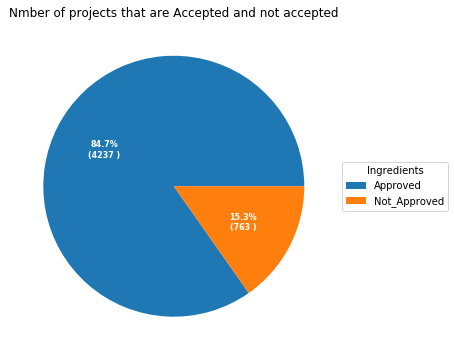

In [9]:
### plotting pie and danut chart 
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

recipe = ["Approved","Not_Approved"]

data = [approved_project,not_approved_project]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

#### Observation : 
                       through danut chart plot we can eassily figure out Approved project and rejected project
                         1) Total Approved project :  (84.74 %)
                         2) Total not Approved Project : (15.26 %)

In [10]:
print(train_df["school_state"].head(5))

0    IN
1    FL
2    AZ
3    KY
4    TX
Name: school_state, dtype: object


### 2.Univariate analysis : school state

In [11]:
temp = pd.DataFrame(train_df.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
print(temp.head(5))
print("="*50)
print(temp.tail(5))

  school_state  project_is_approved
0           AK             0.705882
1           AL             0.821429
2           AR             0.884615
3           AZ             0.787879
4           CA             0.844413
   school_state  project_is_approved
46           VT             0.500000
47           WA             0.865979
48           WI             0.819444
49           WV             0.857143
50           WY             0.777778


In [12]:
##  here we replace the column name ===>>  school_state =state_code ,project_is_approved=num_proposals
temp.columns = ['state_code','num_proposals']
temp.sort_values(by=['num_proposals'],inplace=True,kind='quicksort')

### top %  Approval project
print(temp.head(5))
print("="*50)
###  % lowest Approval project
print(temp.tail(5))

   state_code  num_proposals
46         VT       0.500000
41         SD       0.687500
7          DC       0.695652
0          AK       0.705882
50         WY       0.777778
   state_code  num_proposals
11         HI       0.964286
16         KS       0.966667
28         ND       1.000000
8          DE       1.000000
30         NH       1.000000


#### observation :-
                        1)based on school state we can figure out mean of project is Approved.after that reindex it.
                        2) we replace the columnns name (school_state,project_is_approved)====>(state_code,num_proposals) 
                        and sorting the data through num_proposals.

### 2.1 stack bar graph 

In [13]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [14]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(train_df.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(train_df.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(train_df.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


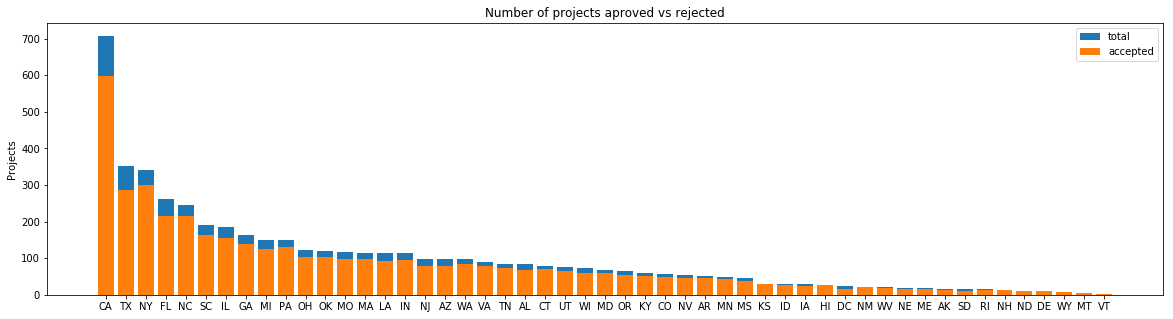

   school_state  project_is_approved  total       Avg
4            CA                  597    707  0.844413
43           TX                  286    352  0.812500
34           NY                  299    342  0.874269
9            FL                  215    261  0.823755
27           NC                  216    246  0.878049
   school_state  project_is_approved  total       Avg
28           ND                   11     11  1.000000
8            DE                   11     11  1.000000
50           WY                    7      9  0.777778
26           MT                    5      6  0.833333
46           VT                    1      2  0.500000


In [15]:
univariate_barplots(train_df,'school_state','project_is_approved',False)

#### observation :
                 this graph show total number of project state wise and how many project are approved andhow many project    are rejected.
                 1) yellow + blue ====> total no. of project state wise
                 2 ) yellow =========> project is approved
                 3) blue =============> rejected project

#### uni variate analysis : teacher_prefix

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


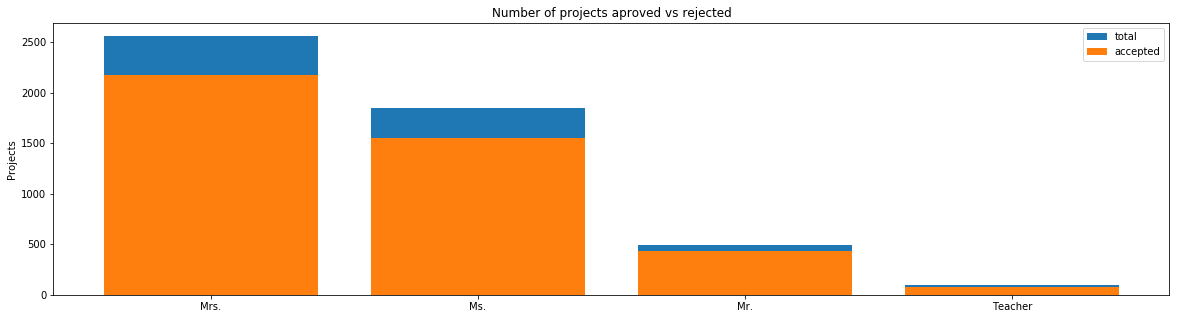

  teacher_prefix  project_is_approved  total       Avg
1           Mrs.                 2173   2560  0.848828
2            Ms.                 1554   1845  0.842276
0            Mr.                  433    495  0.874747
3        Teacher                   77    100  0.770000
  teacher_prefix  project_is_approved  total       Avg
1           Mrs.                 2173   2560  0.848828
2            Ms.                 1554   1845  0.842276
0            Mr.                  433    495  0.874747
3        Teacher                   77    100  0.770000


In [16]:
univariate_barplots(train_df,'teacher_prefix','project_is_approved',False)

#### observation :
                it will show total number of teacher prefix
                1) yellow + blue ======> total number of teacher prefix
                2) yellow =====> project is approved
                3) blue =======> rejected project

#### Uni variate analysis : project_grade_category

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


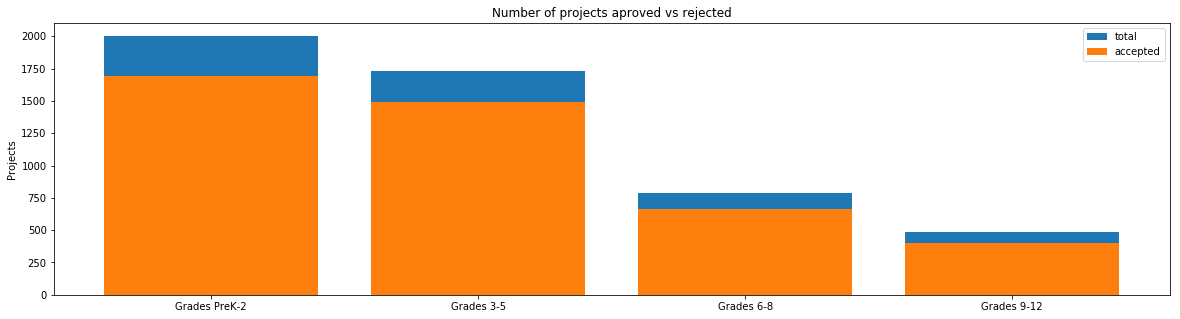

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                 1689   2002  0.843656
0             Grades 3-5                 1491   1729  0.862348
1             Grades 6-8                  660    785  0.840764
2            Grades 9-12                  397    484  0.820248
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                 1689   2002  0.843656
0             Grades 3-5                 1491   1729  0.862348
1             Grades 6-8                  660    785  0.840764
2            Grades 9-12                  397    484  0.820248


In [17]:
univariate_barplots(train_df,'project_grade_category','project_is_approved',False)

####  observation:
                   Above plot show total number of project based on  project_grade_category .
                   1) yellow + blue ====> total number of project  project_grade_category wise
                   2) yellow========>Approved project  project_grade_category  wise
                   3) blue=========> rejected project  project_grade_category wise

In [18]:
#print(train_df['project_subject_categories'])

####  univariate analysis : project_subject_categories

In [19]:
catogories = list(train_df['project_subject_categories'].values)
#print(catogories)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [20]:
train_df["clean_catogories"] = cat_list
#print(train_df["clean_catogories"])
train_df.drop(['project_subject_categories'], axis=1, inplace=True)
train_df.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_catogories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


#### observation:
                    here we remove special character and removing stop words after preprcessing word we store in 
                    "clean_catogorie" column.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


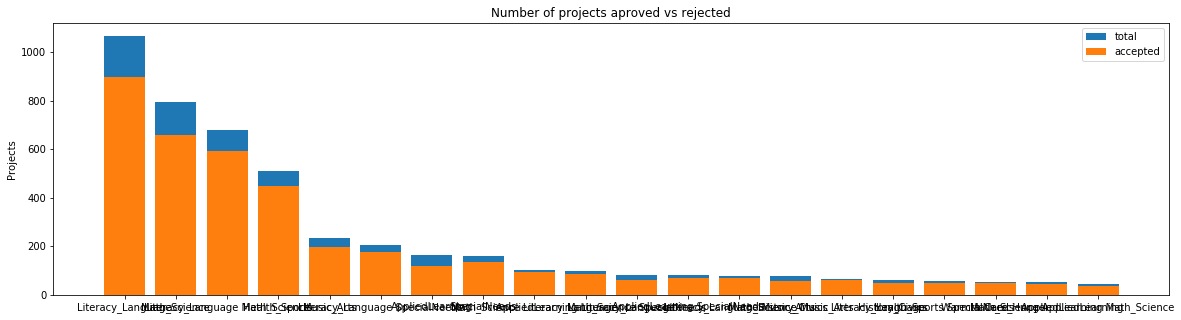

                  clean_catogories  project_is_approved  total       Avg
23               Literacy_Language                  900   1067  0.843486
30                    Math_Science                  659    795  0.828931
26  Literacy_Language Math_Science                  594    679  0.874816
8                    Health_Sports                  447    509  0.878193
37                      Music_Arts                  199    233  0.854077
                clean_catogories  project_is_approved  total       Avg
16                History_Civics                   47     63  0.746032
14    Health_Sports SpecialNeeds                   49     57  0.859649
46            Warmth Care_Hunger                   47     53  0.886792
31  Math_Science AppliedLearning                   44     52  0.846154
4   AppliedLearning Math_Science                   35     44  0.795455


In [21]:
univariate_barplots(train_df,'clean_catogories','project_is_approved',top=20)

#### observation :
                    after preprocessing data we categrized total no. of project based on clean catogories .
                    1) yellow + blue ========> toal project based on clean categories
                    2) yellow ======> Approved project based on clean categories
                    3) blue =======>rejected project


In [22]:
### count all the words in subject categories :
from collections import Counter
my_counter = Counter()
for word in train_df["clean_catogories"].values:
    my_counter.update(word.split())
   # print(my_counter)

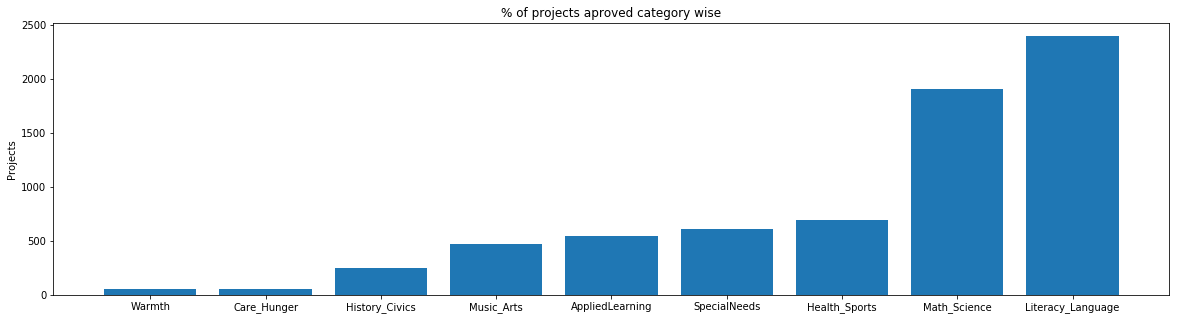

In [23]:
cat_dict = dict(my_counter)
sorted_by_value = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(sorted_by_value))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_by_value.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_by_value.keys()))
plt.show()
#sort_by_value

#### observation :
                       here we count the total words and plot the count of words based on clean category/subject categories.
                       it show the counting of the words:-
                       1) Literacy_language ===> 2300 words
                       2) mat_scince ======> approximate 2000 words
                       3) health_sports ====> app. 800 words
                       4) specailNeeds =====> 600-700 words
                       5) AppleadLearining===>600 words
                       6) MusicArts ====> 500 words
                       7) histore_civic ====> 300 words
                       8) care_hunger =====> 200 appreoximate
                       9) warmth =======> 100 app.

In [24]:
for i , j in sorted_by_value.items():
    print("{:10}:{:10}".format(i,j))

Warmth    :        58
Care_Hunger:        58
History_Civics:       252
Music_Arts:       476
AppliedLearning:       547
SpecialNeeds:       614
Health_Sports:       697
Math_Science:      1910
Literacy_Language:      2400


#### Uni variate analysis : project_subject_subcategories

In [25]:
print(train_df['project_subject_subcategories'].head(5))

0                       ESL, Literacy
1    Civics & Government, Team Sports
2      Health & Wellness, Team Sports
3               Literacy, Mathematics
4                         Mathematics
Name: project_subject_subcategories, dtype: object


In [26]:
subsubject_category = list(train_df["project_subject_subcategories"].values)
#print(subsubject_category)
sub_cat_list = []
for i in subsubject_category:
    temp = ""
    for j in i.split(','):
        # print(j)
        if 'The' in j.split():
            j = j.replace('The','')
        j = j.replace(' ','')
        temp = temp + j.strip() + " "
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())
    

In [27]:
### after cleaning the project_subject_subcategories data ::--
train_df["clean_subcateegory"] = sub_cat_list

print(train_df["clean_subcateegory"].head(5))
print("="*50)
print(train_df["project_subject_subcategories"].head(5))

0                    ESL Literacy
1    Civics_Government TeamSports
2      Health_Wellness TeamSports
3            Literacy Mathematics
4                     Mathematics
Name: clean_subcateegory, dtype: object
0                       ESL, Literacy
1    Civics & Government, Team Sports
2      Health & Wellness, Team Sports
3               Literacy, Mathematics
4                         Mathematics
Name: project_subject_subcategories, dtype: object


In [28]:
### drop project_subject_subcategories column 
train_df.drop(["project_subject_subcategories"],axis=1)
print(train_df.head(2))

   Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the lim

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


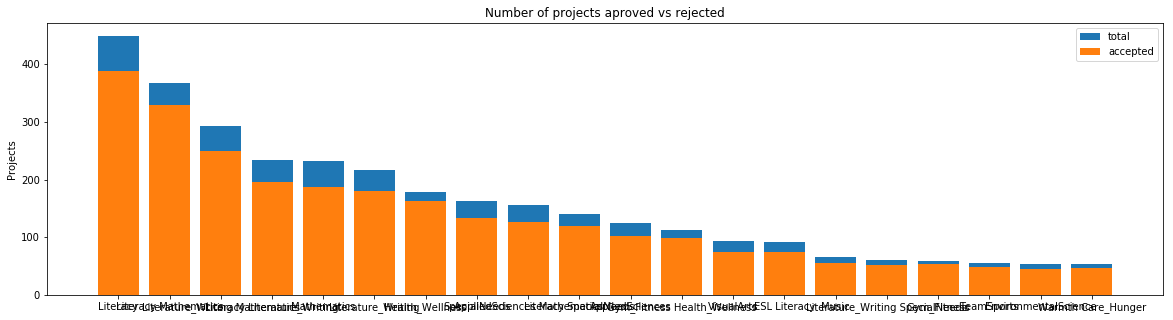

                 clean_subcateegory  project_is_approved  total       Avg
189                        Literacy                  389    449  0.866370
191            Literacy Mathematics                  329    368  0.894022
201  Literature_Writing Mathematics                  250    293  0.853242
190     Literacy Literature_Writing                  195    234  0.833333
209                     Mathematics                  188    232  0.810345
                  clean_subcateegory  project_is_approved  total       Avg
207  Literature_Writing SpecialNeeds                   51     60  0.850000
143                      Gym_Fitness                   53     58  0.913793
244                       TeamSports                   48     56  0.857143
111             EnvironmentalScience                   45     53  0.849057
247               Warmth Care_Hunger                   47     53  0.886792


In [29]:
### plotting project_subject_subcategories
univariate_barplots(train_df,'clean_subcateegory','project_is_approved',top=20)

#### observation:
           1)firtly we preprocess data / cleaned that project_subject_subcategories.and clean data stored into
                clean_subcateegory column.
                2)based on clean_subcategory we categorized the total number of project and how many projects are approved and
                how many projects are Not approved.
                2)based on clean_subcategory we categorized the total number of project and how many projects are approved and
                how many projects are Not approved.
                   

In [30]:
### counting all the words in project_subject_subcategories
from collections import Counter
my_counter = Counter()
for word in train_df["clean_subcateegory"].values:
    my_counter.update(word.split())
    

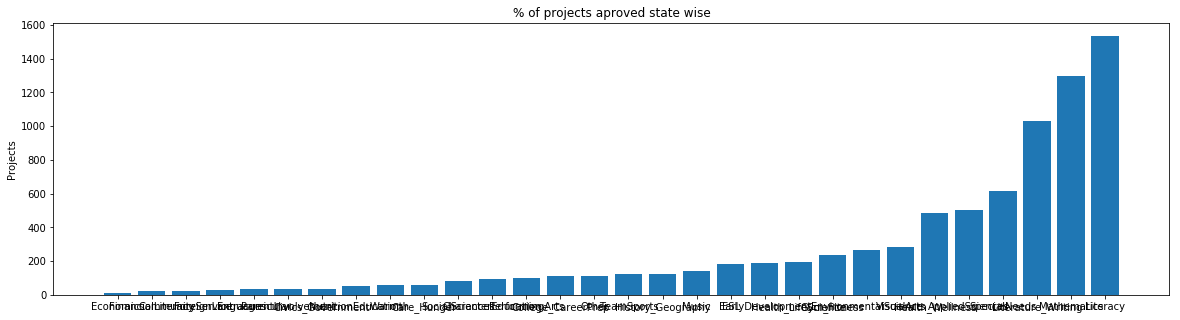

In [31]:
sub_cat_dict = dict(my_counter)
#print(sub_cat_dict)
sorted_by_value = dict(sorted(my_counter.items(), key=lambda kv: kv[1]))
#print(sorted_by_value)

ind = np.arange(len(sorted_by_value))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_by_value.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_by_value.keys()))
plt.show()

####  Observation : 
                      we count total number of words and categoriged words and based on sub_categories we ploting
                      and how many words are there as below..we can eassily find

In [32]:
for i,j in sub_cat_dict.items():
    print("{:20}:{:20}".format(i,j))

ESL                 :                 182
Literacy            :                1534
Civics_Government   :                  36
TeamSports          :                 123
Health_Wellness     :                 486
Mathematics         :                1295
Literature_Writing  :                1032
SpecialNeeds        :                 614
ParentInvolvement   :                  34
EnvironmentalScience:                 265
Health_LifeScience  :                 196
AppliedSciences     :                 504
EarlyDevelopment    :                 189
Music               :                 142
ForeignLanguages    :                  29
Other               :                 114
Economics           :                  14
FinancialLiteracy   :                  23
Gym_Fitness         :                 237
VisualArts          :                 282
Warmth              :                  58
Care_Hunger         :                  58
SocialSciences      :                  82
College_CareerPrep  :             

####  univariate analysis :    Text feature:

In [33]:
#print(train_df["project_title"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


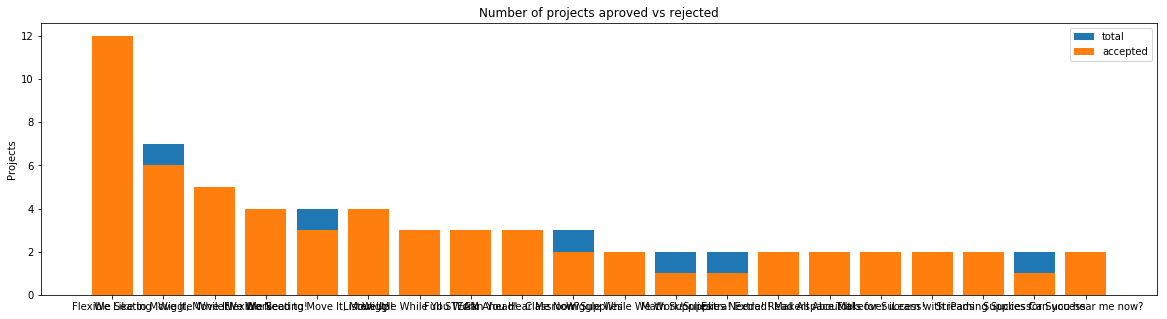

                     project_title  project_is_approved  total       Avg
1500              Flexible Seating                   12     12  1.000000
4549  We Like to Move It, Move It!                    6      7  0.857143
4693          Wiggle While We Work                    5      5  1.000000
1564             Flexible Seating!                    4      4  1.000000
4582  We Need to Move It, Move It!                    3      4  0.750000
             project_title  project_is_approved  total  Avg
4427    Tools for Success!                    2      2  1.0
4884     iLearn with iPads                    2      2  1.0
3957     Streaming Success                    2      2  1.0
4049  Supplies for Success                    1      2  0.5
687   Can you hear me now?                    2      2  1.0


In [34]:
### plotting project_subject_subcategories
univariate_barplots(train_df,'project_title','project_is_approved',top=20)

#### obseravtion:
                 project is approved or not we analysis based on project tilte b'coz its important to us which project title is Approved often time and which is rejected .

In [35]:
#print(train_df["project_title"].value_counts())

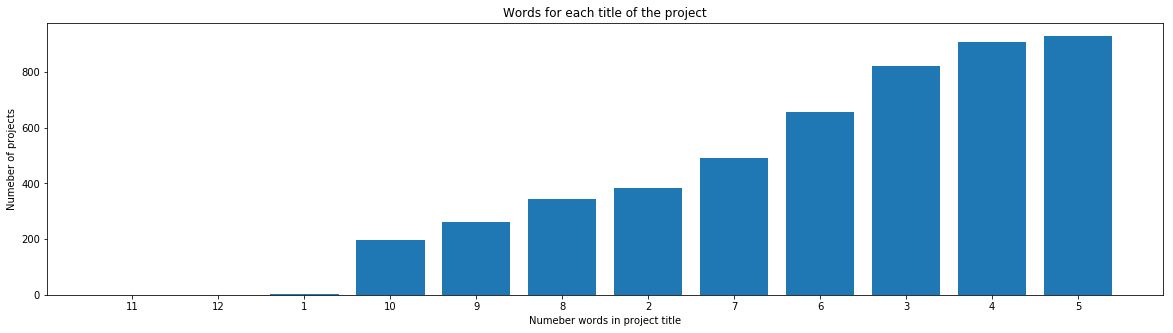

In [36]:
count = train_df['project_title'].str.split().apply(len).value_counts()
#print(count)
word_dict = dict(count)
#print(word_dict)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
#print(word_dict)
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

#### observation :
                   Counting words based on the project titles
                   here most of the project titles ====> 4-5 words and some titles are 8-10 words.
                   

In [37]:
###
approved_project_title = train_df[train_df["project_is_approved"]==1]["project_title"].str.split().apply(len)
#print(approved_project_title)
not_approved_project_title = train_df[train_df["project_is_approved"]==0]["project_title"].str.split().apply(len)
#print(not_approved_project_title)

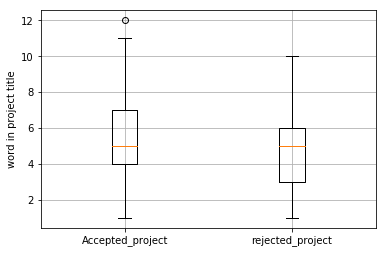

In [38]:
### plotting Boxplot 
plt.boxplot([approved_project_title,not_approved_project_title])
plt.xticks([1,2],('Accepted_project','rejected_project'))
plt.ylabel("word in project title")
plt.grid()
plt.show()

#### observation : 
            Box plot shows the Number of Accepted project titles and Number of rejected projected titles
            in this plot Both (Approved and rejected project) mean are almost similar but 25percentile and 75 percentile
                   are different 

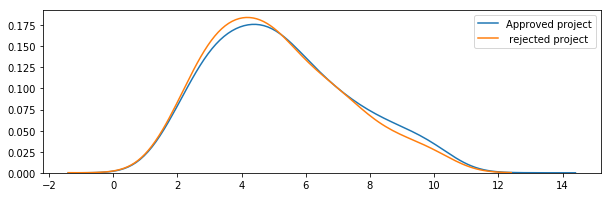

In [39]:
import seaborn as sns
plt.figure(figsize=(10,3))
sns.kdeplot(approved_project_title, bw=.8, label="Approved project")
sns.kdeplot(not_approved_project_title, bw=.8, label=" rejected project ")
plt.legend()
plt.show()

#### observation :
         This plot shows here Approved and rejected projected
         1) blue curve shows here ===> Approved project
         2) yellow curve shows here ===> rejected projected
         

### univariate analysis :    Text feature(project_essay_1)

In [40]:
#univariate_barplots(train_df,'project_essay_1','project_is_approved',top=20)

In [41]:
train_df["Eassy"] = train_df["project_essay_1"].map(str) +\
train_df["project_essay_2"].map(str) +\
train_df["project_essay_3"].map(str) +\
train_df["project_essay_4"].map(str)

approved_project_title = train_df[train_df["project_is_approved"]==1]["project_title"].str.split().apply(len)
#print(train_df["Eassy"].value_counts())

In [42]:
#approved_project_title = train_df[train_df["project_is_approved"]==1]["project_title"].str.split().apply(len)

approved_word_project = train_df[train_df["project_is_approved"]==1]["Eassy"].str.split().apply(len)
#print(approved_word_project.values)
not_approved_word_count = train_df[train_df["project_is_approved"]==0]["Eassy"].str.split().apply(len)
#print(not_approved_word_count)

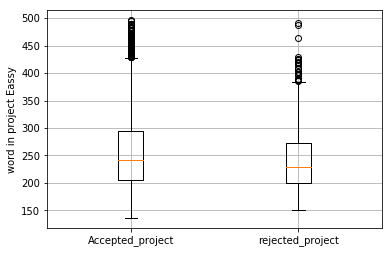

In [43]:
plt.boxplot([approved_word_project,not_approved_word_count])
plt.xticks([1,2],('Accepted_project','rejected_project'))
plt.ylabel("word in project Eassy")
plt.grid()
plt.show()

#### observations :
                Firstly we mapped all Eassy after that based on total Eassy_1,Eassy_2,Eassy_3,Eassy_4.
                and we compare throgh boxplot.
                

In [44]:
print(train_df.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_subcategories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_catogories', 'clean_subcateegory', 'Eassy'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


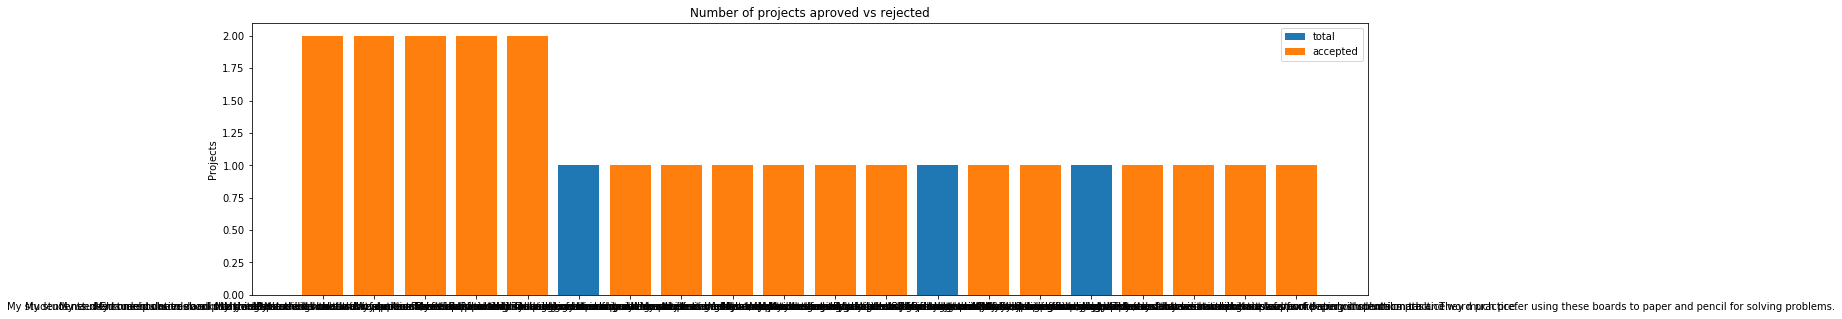

                               project_resource_summary  project_is_approved  \
450   My students need Chromebooks to do all the thi...                    2   
2395  My students need chromebooks to do all the thi...                    2   
3506  My students need more options for flexible sea...                    2   
2975  My students need hands-on opportunities to exp...                    2   
1028  My students need a class set of cushions, head...                    2   

      total  Avg  
450       2    1  
2395      2    1  
3506      2    1  
2975      2    1  
1028      2    1  
                               project_resource_summary  project_is_approved  \
3325  My students need makeup effects, hazmat suits,...                    0   
3324  My students need magnetic letters, magnetic wh...                    1   
3323  My students need magnetic letters to use in sm...                    1   
3322  My students need magnetic dry erase boards to ...                    1   
3321 

In [45]:
#print(train_df["project_resource_summary"])
univariate_barplots(train_df,'project_resource_summary','project_is_approved',top=20)

#### observation :
                we categorized the projects based on the project_resource_summary.

In [46]:
#univariate_barplots(train_df,'project_resource_summary','project_is_approved',top=20)

In [47]:
resource_data = pd.read_csv("resources.csv")
print(resource_data.head(5))
print("="*50)
print(resource_data.columns)

        id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95  
Index(['id', 'description', 'quantity', 'price'], dtype='object')


In [48]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
print(price_data.head(2))

        id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21


In [49]:
### merge two dataframe 
a = pd.merge(train_df,price_data,how="left")
print(a.columns)
print("="*50)
print(a.head(5))

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_subcategories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_catogories', 'clean_subcateegory', 'Eassy', 'price', 'quantity'],
      dtype='object')
   Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_

In [50]:
approved_price = a[a["project_is_approved"]==1]['price'].values
print("approved_price : ",approved_price)
print("="*50)
rejected_price = a[a["project_is_approved"]==0]['price'].values
print("rejected_price : ",rejected_price)


approved_price :  [299.   232.9   67.98 ... 201.07 170.57  39.97]
rejected_price :  [ 154.6   516.85  219.46   91.94  278.09  268.99  129.98  589.    397.9
  189.03  224.09  433.76  260.02  142.84  147.32 4102.47  428.07  347.54
  353.65  789.92 1414.94  849.02   75.01  269.63  401.96   41.64  443.63
  188.83  232.18  270.94  149.48  442.39  299.33  379.94  178.73  329.95
  404.87  282.54  957.85   20.31   33.98  177.74  188.03  189.    466.86
   32.48  335.97   33.95  393.27   19.11  173.2   938.96  518.98  292.97
  685.97  180.32  448.95  250.42  169.99  560.92   74.83  135.58  154.34
  292.9   809.97  328.95 1292.17  180.46  338.99  175.42  685.62  767.99
  617.99   59.79  409.64  125.33  468.98  144.62  635.92  596.53  938.07
  323.93  410.43  193.24  607.69   40.59  131.18  415.85   27.11  308.81
  470.34  221.89  125.72  321.82  103.14  159.    289.04   84.96  140.07
  415.31  406.2   149.92  639.88  383.93 1868.35  282.58 1711.03   71.99
   81.49  293.23   88.11  170.89   39.98 

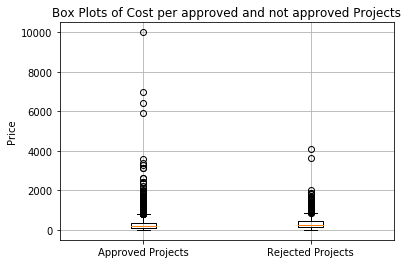

In [51]:
## plotting Box plot
plt.boxplot([approved_price,rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

#### observation:
                 we categorized Approved project and rejected project based on Cost.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


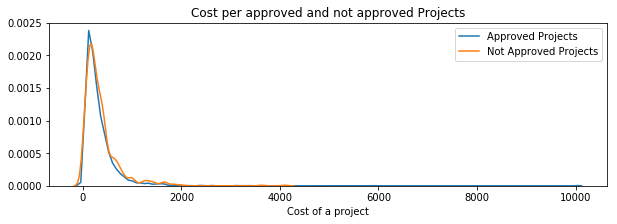

In [52]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

### observation : 
                   we categorized number of approved and not approved project based on cost price.

In [53]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Percentile ","Approved Projects", "Not Approved Projects"]
for i in range(0,105,5):
    x.add_row([i,np.round(np.percentile(approved_price,i),3),np.round(np.percentile(rejected_price,i),3)])
print(x)

+-------------+-------------------+-----------------------+
| Percentile  | Approved Projects | Not Approved Projects |
+-------------+-------------------+-----------------------+
|      0      |        1.44       |          5.19         |
|      5      |       14.664      |         40.045        |
|      10     |       35.41       |         75.106        |
|      15     |       56.788      |        104.181        |
|      20     |       75.848      |        126.288        |
|      25     |       100.21      |        145.665        |
|      30     |      119.948      |        159.996        |
|      35     |       139.99      |        180.088        |
|      40     |       159.43      |        207.546        |
|      45     |       179.0       |        232.279        |
|      50     |       200.77      |         258.07        |
|      55     |      229.636      |        289.256        |
|      60     |      259.744      |        314.946        |
|      65     |      288.936      |     

### observation :
              we calculate number of percentile which is Approved project and which is Not Approved project

####  uni variate analysis : teacher_number_of_previously_posted_projects ::--

In [54]:
#print(train_df["teacher_number_of_previously_posted_projects"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


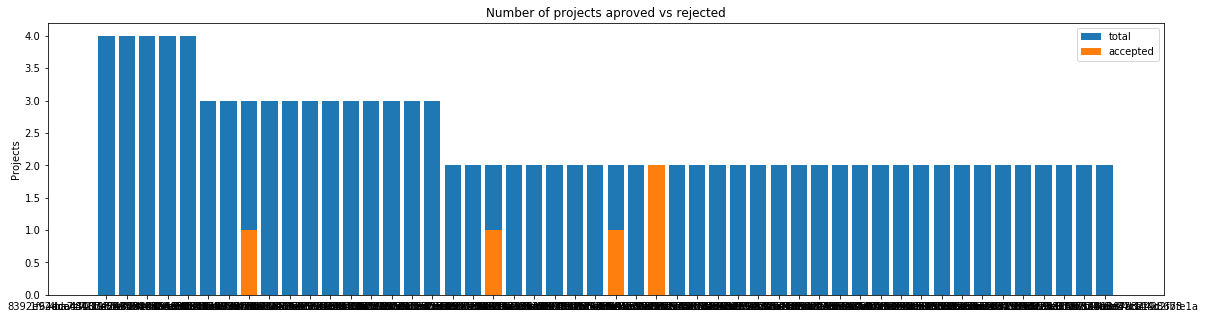

                            teacher_id  \
2393  8392e92eda43003e742c98680ce68ce5   
588   1f64dcec848be8e95c4482cc845706b2   
1393  4ba7c721133ef651ca54a03551746708   
1260  4416745560343f14a74dedcda4ec03b0   
487   19f24640d9da49f6f8b4c9938c049591   

      teacher_number_of_previously_posted_projects  total     Avg  
2393                                             0      4   32.00  
588                                              0      4  266.50  
1393                                             0      4   26.25  
1260                                             0      4   83.50  
487                                              0      4  173.00  
                            teacher_id  \
4229  e330ccb2aeeb51f5ede75a1567b04ece   
1896  66c30e1da1934d7cfe810ba79f6e04c1   
1150  3edf1305f38913e71fb824ddd87ca19c   
764   28c79193c9c864f25add867dd4428673   
2307  7f3d2d332637fc7a8e4a82f4d2fbfe1a   

      teacher_number_of_previously_posted_projects  total    Avg  
4229               

In [55]:
univariate_barplots(train_df,'teacher_id','teacher_number_of_previously_posted_projects',top=50)

In [56]:
print(train_df.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_subcategories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_catogories', 'clean_subcateegory', 'Eassy'],
      dtype='object')


In [57]:
A=train_df.loc[:, ['teacher_id', 'teacher_number_of_previously_posted_projects']].head(20)
#print(A.columns)

### observation:
                   we plot here top 50 datapoint we ploting here based on teacher id how many projects are submitted (teacher_number_of_previously_posted_projects)

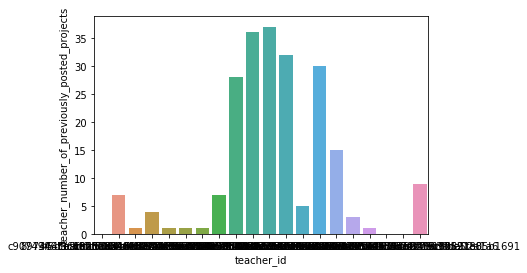

In [58]:
### through scatter plot 
import seaborn as sns
#sns.set(style="whitegrid")
x = "teacher_id"
y = "teacher_number_of_previously_posted_projects"

sns.barplot(x,y,data=A)
plt.show()

In [59]:
print(train_df["teacher_number_of_previously_posted_projects"].head(20))

0      0
1      7
2      1
3      4
4      1
5      1
6      1
7      7
8     28
9     36
10    37
11    32
12     5
13    30
14    15
15     3
16     1
17     0
18     0
19     9
Name: teacher_number_of_previously_posted_projects, dtype: int64


#### observation:
                  Through seaborn we are plotting Top 20 datapoints to display here based on project_id it shows how much project previously submitted(teacher_number_of_previously_posted_projects)

####  univaraite analysis :: -  project_resource_summary

In [60]:
print(train_df.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_subcategories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_catogories', 'clean_subcateegory', 'Eassy'],
      dtype='object')


In [61]:
print(train_df["project_resource_summary"].head(10))

0    My students need opportunities to practice beg...
1    My students need a projector to help with view...
2    My students need shine guards, athletic socks,...
3    My students need to engage in Reading and Math...
4    My students need hands on practice in mathemat...
5    My students need movement to be successful. Be...
6    My students need some dependable laptops for d...
7    My students need ipads to help them access a w...
8    My students need three devices and three manag...
9    My students need great books to use during Ind...
Name: project_resource_summary, dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


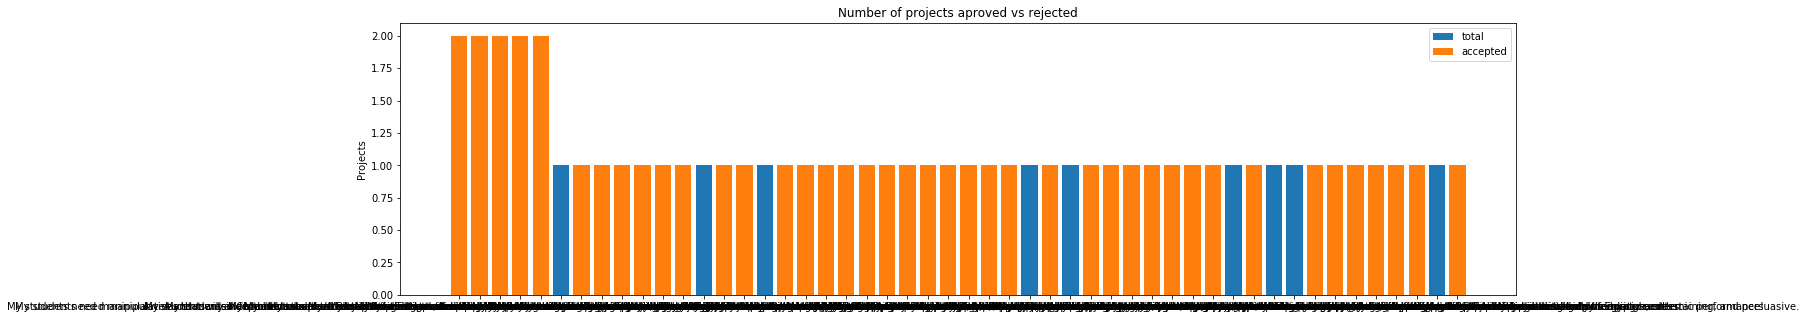

                               project_resource_summary  project_is_approved  \
450   My students need Chromebooks to do all the thi...                    2   
2395  My students need chromebooks to do all the thi...                    2   
3506  My students need more options for flexible sea...                    2   
2975  My students need hands-on opportunities to exp...                    2   
1028  My students need a class set of cushions, head...                    2   

      total  Avg  
450       2    1  
2395      2    1  
3506      2    1  
2975      2    1  
1028      2    1  
                               project_resource_summary  project_is_approved  \
3295  My students need leveled texts so they can rec...                    1   
3294  My students need leveled reading material to s...                    1   
3293  My students need leveled reading books to incr...                    1   
3292  My students need leveled readers, rekenereks, ...                    0   
3291 

In [62]:
### 
univariate_barplots(train_df,'project_resource_summary','project_is_approved',top=50)

#### observation: 
                    we plotting here based on project_resource_summary we categorized total number of projects .
                   

# 3. preprocessing :

In [63]:
print(train_df.head(2))

   Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the lim

#### observation :
                  here we got two columns we need to preproceesing data 
                  1)Eassy
                  2)project_title

In [64]:
print(train_df["Eassy"].values[0])
print("="*50)
print(train_df["Eassy"].values[10])
print("="*50)
print(train_df["Eassy"].values[1000])
print("="*50)
print(train_df["Eassy"].values[1500])
print("="*50)
print(train_df["Eassy"].values[2000])
print("="*50)
print(train_df["Eassy"].values[2500])

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [65]:
##removing contraction english language  don't ==> do not
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
#print(decontracted(train_df["Eassy"].values[2500]))

In [66]:
sent = (decontracted(train_df["Eassy"].values[2500]))
print(sent)
#sent_1 = (decontracted(train_df["Eassy"].values[2000]))
#print(sent_1)

My students attend a low income/high poverty title one school in east Charlotte. They come in with a variety of pasts and different home lives, but they do their very best to meet their potential each and every day. My students are intelligent and so determined! They tend to look at life with a different perspective - an inspiring one. We want to make sure that all needs are met so that when at school, their main focus is overcoming obstacles and meeting their goals!Each student who walks through my door receives free breakfast and lunch at school.  Our third graders eat breakfast at 7:30 in the morning and do not eat lunch until 1:30. For a student, that is a very long time to be working academically without refueling. We want our scholars to have the energy to participate and learn in all subjects throughout the morning! Each child has the ability to reach their goals, but we need to make sure they have all of the necessities. Allowing us to keep snacks in the classroom will give our

In [67]:
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students attend a low income high poverty title one school in east Charlotte They come in with a variety of pasts and different home lives but they do their very best to meet their potential each and every day My students are intelligent and so determined They tend to look at life with a different perspective an inspiring one We want to make sure that all needs are met so that when at school their main focus is overcoming obstacles and meeting their goals Each student who walks through my door receives free breakfast and lunch at school Our third graders eat breakfast at 7 30 in the morning and do not eat lunch until 1 30 For a student that is a very long time to be working academically without refueling We want our scholars to have the energy to participate and learn in all subjects throughout the morning Each child has the ability to reach their goals but we need to make sure they have all of the necessities Allowing us to keep snacks in the classroom will give our students the ch

In [68]:
### here we \n \r 

sent = sent.replace('\\n', ' ').replace('\\r', '')
print(sent)

My students attend a low income high poverty title one school in east Charlotte They come in with a variety of pasts and different home lives but they do their very best to meet their potential each and every day My students are intelligent and so determined They tend to look at life with a different perspective an inspiring one We want to make sure that all needs are met so that when at school their main focus is overcoming obstacles and meeting their goals Each student who walks through my door receives free breakfast and lunch at school Our third graders eat breakfast at 7 30 in the morning and do not eat lunch until 1 30 For a student that is a very long time to be working academically without refueling We want our scholars to have the energy to participate and learn in all subjects throughout the morning Each child has the ability to reach their goals but we need to make sure they have all of the necessities Allowing us to keep snacks in the classroom will give our students the ch

In [69]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [70]:
## combine all the above statments :for doing well text preprocesssing
from tqdm import tqdm
text = []
for sentence in tqdm(train_df["Eassy"].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    text.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00, 1702.54it/s]


#### observation :
                  firstly we clean our data/remove special character and \r,\n after that we combine all the Above text.

In [71]:
print(text[2000])
print("="*50)
print(text[1500])
print("="*50)
print(text[2000])

describing students not easy task many would say inspirational creative hard working they unique unique interests learning abilities much what common desire learn day despite difficulties encounter our classroom amazing understand everyone learns pace as teacher i pride making sure students always engaged motivated inspired create learning this project help students choose seating appropriate developmentally many students tire sitting chairs lessons different seats available helps keep engaged learning flexible seating important classroom many students struggle attention focus engagement we currently stability balls seating well regular chairs stools help students trouble balance find difficult sit stability ball long period time we excited try stools part engaging classroom community nannan
our classroom center based students social emotional disorders come receive education deserve my students encounter trials tribulations daily basis inside outside classroom in classroom celebrate d

### text preprocessing : project title

In [72]:
print(train_df["project_title"].values[7])
print("="*50)
print(train_df["project_title"].values[9])
print("="*50)
print(train_df["project_title"].values[650])
print("="*50)
print(train_df["project_title"].values[16])
print("="*50)
print(train_df["project_title"].values[4971])

It's the 21st Century
Just For the Love of Reading--\r\nPure Pleasure
Listen and Love Learning! Headphones Needed!
Making Great LEAP's With Leapfrog!
Yummy, Healthy Snacks To Get Rid Of The Munchies!


In [73]:
### removing will'nt ==> will not
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [74]:
line = decontracted(train_df["project_title"].values[7])
print(line)
print("="*50)


It is the 21st Century


In [75]:
#removing special character \n \r
line = line.replace('\\r', ' ')
line = line.replace('\\n', ' ')
line = line.replace('\\"', ' ')
print(line)

It is the 21st Century


In [76]:
## removing special character 
import re
line = re.sub(r"[^a-zA-Z0-9]"," ",line)
line

'It is the 21st Century'

In [77]:
#print(stopwords)

In [78]:
## combine all above statment 
from tqdm import tqdm
text_all = []
for sentence in tqdm(train_df["project_title"].values):
    line = decontracted(sentence)
    line = line.replace('\\r', ' ')
    line = line.replace('\\n', ' ')
    line = line.replace('\\"', ' ')
    line = re.sub('[^A-Za-z0-9]+', ' ', line)
    
    line = ' '.join(j for j in line.split() if j not in stopwords)
    text_all.append(line.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 26672.33it/s]


#### observation :
                 after cleaning/removing all the special character and all stopwords we preprocess text data.

In [79]:
## after preprocessing
print(text_all[7])
print("="*50)
print(text_all[9])
print("="*50)
print(text_all[650])
print("="*50)
print(text_all[16])
print("="*50)
print(text_all[4971])


it 21st century
just for love reading pure pleasure
listen love learning headphones needed
making great leap with leapfrog
yummy healthy snacks to get rid of the munchies


#### observation:
                here after preprocess our project_title look's like this
                after removing \n,\r
                after removing special character's

# 4.preparing data for Models :

In [80]:
print(train_df.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_subcategories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_catogories', 'clean_subcateegory', 'Eassy'],
      dtype='object')


#### observation :
               here some columns are categorical ,numerical and text data:
               1) Categorical data:
               -------------------- 'teacher_prefix','school_state','project_grade_category','project_subject_subcategories'
               2) text data:
               -------------  'Eassy','project_resource_summary',
               3) Numerical data:
               -------------------   'teacher_number_of_previously_posted_projects'
               

In [81]:
#print(sub_cat_dict.keys())

In [82]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_by_value.keys()),lowercase =False)
vectorizer.fit(train_df["clean_catogories"].values)
print(vectorizer.get_feature_names())

sub_cat_one_hot = vectorizer.transform(train_df["clean_catogories"].values)
print(sub_cat_one_hot.shape)

['Economics', 'FinancialLiteracy', 'CommunityService', 'ForeignLanguages', 'Extracurricular', 'ParentInvolvement', 'Civics_Government', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'CharacterEducation', 'PerformingArts', 'College_CareerPrep', 'Other', 'TeamSports', 'History_Geography', 'Music', 'ESL', 'EarlyDevelopment', 'Health_LifeScience', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
(5000, 30)


In [83]:
#print(train_df["clean_catogories"].head(5))
#print("="*50)
#print(train_df["clean_subcateegory"].head(5))

In [84]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sub_cat_dict.keys()),lowercase =False)
vectorizer.fit(train_df["school_state"].values)
print(vectorizer.get_feature_names())

sub_cat_one_hot = vectorizer.transform(train_df["school_state"].values)
print(sub_cat_one_hot.shape)

['ESL', 'Literacy', 'Civics_Government', 'TeamSports', 'Health_Wellness', 'Mathematics', 'Literature_Writing', 'SpecialNeeds', 'ParentInvolvement', 'EnvironmentalScience', 'Health_LifeScience', 'AppliedSciences', 'EarlyDevelopment', 'Music', 'ForeignLanguages', 'Other', 'Economics', 'FinancialLiteracy', 'Gym_Fitness', 'VisualArts', 'Warmth', 'Care_Hunger', 'SocialSciences', 'College_CareerPrep', 'CharacterEducation', 'PerformingArts', 'CommunityService', 'History_Geography', 'NutritionEducation', 'Extracurricular']
(5000, 30)


# 4.1Building Data matrix

### 4.1.1 school_state : categorical data (one hot encoding) :-

In [85]:
school_data = list(train_df["school_state"].values)
#print(school_data)
school_df = dict(school_data)
#print(school_df)

In [86]:
## count all words
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in train_df['school_state'].values:
    my_counter.update(word.split())

In [87]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_school_df = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=True,vocabulary=list(sorted_school_df.keys()),binary=True)
vectorizer.fit(train_df['school_state'].values)
print(vectorizer.get_feature_names())


['VT', 'MT', 'WY', 'DE', 'ND', 'NH', 'RI', 'SD', 'AK', 'ME', 'NE', 'WV', 'NM', 'DC', 'HI', 'ID', 'IA', 'KS', 'MS', 'MN', 'AR', 'NV', 'CO', 'KY', 'OR', 'MD', 'WI', 'UT', 'CT', 'AL', 'TN', 'VA', 'WA', 'AZ', 'NJ', 'IN', 'LA', 'MA', 'MO', 'OK', 'OH', 'PA', 'MI', 'GA', 'IL', 'SC', 'NC', 'FL', 'NY', 'TX', 'CA']


In [89]:
print(train_df.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_subcategories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_catogories', 'clean_subcateegory', 'Eassy'],
      dtype='object')


### 4.1.2 clean_categories :categorical data (one hot encoding) :-

In [90]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in train_df['clean_catogories'].values:
    my_counter.update(word.split())

In [91]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


#ind = np.arange(len(sorted_cat_dict))
#plt.figure(figsize=(20,5))
#p1 = plt.bar(ind, list(sorted_cat_dict.values()))

#plt.ylabel('Projects')
#plt.title('% of projects aproved category wise')
#plt.xticks(ind, list(sorted_cat_dict.keys()))
#plt.show()

In [92]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(train_df['clean_catogories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(train_df['clean_catogories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (5000, 9)


In [93]:
print(train_df.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_subcategories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_catogories', 'clean_subcateegory', 'Eassy'],
      dtype='object')


###  clean_subcateegory : categorical data (one hot encoding) :-


In [94]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in train_df['clean_subcateegory'].values:
    my_counter.update(word.split())

In [95]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [96]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(train_df['clean_subcateegory'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(train_df['clean_subcateegory'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Economics', 'FinancialLiteracy', 'CommunityService', 'ForeignLanguages', 'Extracurricular', 'ParentInvolvement', 'Civics_Government', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'CharacterEducation', 'PerformingArts', 'College_CareerPrep', 'Other', 'TeamSports', 'History_Geography', 'Music', 'ESL', 'EarlyDevelopment', 'Health_LifeScience', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (5000, 30)


### teacher_prefix : categorical data (one hot encoding):

In [97]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in train_df['teacher_prefix'].values:
    my_counter.update(word.split())

In [98]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [99]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(train_df['teacher_prefix'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(train_df['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (5000, 4)


### project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)

In [100]:
vectorizer = CountVectorizer()
title_text =  vectorizer.fit_transform(text_all)
print("Shape of matrix after one hot encodig ",title_text.shape)

Shape of matrix after one hot encodig  (5000, 3881)


In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=15)
title_ifidf = vectorizer.fit_transform(text_all)
print("shape of matrix after one hot encoding ",title_ifidf.shape)

shape of matrix after one hot encoding  (5000, 254)


In [102]:
## storing variable into pickle file
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())
   # print(glove_words)

In [103]:
## preparing pretrained models 
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.6B.50d.txt')

Loading Glove Model


400000it [00:09, 42768.01it/s]


Done. 400000  words loaded!


In [104]:
### avgW2V 'project_title'
avgW2V = []
for sentences in tqdm(text_all):
    vector = np.zeros(300)
    count = 0
    for word in sentence.split():
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                count += 1
        if count != 0:
            vector /= count
    avgW2V.append(vector)

print(len(avgW2V))
print(len(avgW2V[0]))
        

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 80102.06it/s]


5000
300


In [105]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(text_all)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

### price : numerical

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(resources_df["price"].values.reshape(-1,1))
print("Mean",scaler.mean_[0])
print("standard dev. ",np.sqrt(scaler.var_[0]))
price_standarized = scaler.transform(resources_df["price"].values.reshape(-1,1))
print("="*50)
print(price_standarized)

Mean 50.609516000000006
standard dev.  125.58820014175593
[[ 0.78343733]
 [-0.28394002]
 [-0.33569647]
 ...
 [ 0.83121252]
 [ 1.73894111]
 [-0.32375268]]


### teacher_number_of_previously_posted_projects : numerical

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_df["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
print("Mean",scaler.mean_[0])
print("standard dev. ",np.sqrt(scaler.var_[0]))
price_standarized = scaler.transform(train_df["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
print("="*50)
print(price_standarized)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Mean 10.7566
standard dev.  26.79330058876659


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[-0.40146603]
 [-0.14020669]
 [-0.36414327]
 ...
 [ 0.90483067]
 [-0.14020669]
 [-0.3268205 ]]


## 5.Bag Of Words : 

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df=10)
text_bow = count_vect.fit_transform(text)
print(text_bow.shape)


(5000, 4373)


#### observation :
               we apply here Bag of Vector out of 5000 datapoint we find 4373 unique words

#### BOW : project_title

In [110]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
text_BOW = count_vector.fit_transform(text_all)
print(text_BOW.shape)

(5000, 3881)


In [111]:
print(type(text_BOW))

<class 'scipy.sparse.csr.csr_matrix'>


In [112]:
print(text_BOW.get_shape())

(5000, 3881)


#### Bi-Grams and n-Grams:

In [113]:
count_vect = CountVectorizer(ngram_range=(1,2) ) 
final_bigram_counts = count_vect.fit_transform(text_all)
print(type(final_bigram_counts))

<class 'scipy.sparse.csr.csr_matrix'>


In [114]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler(with_mean = False).fit_transform(final_bigram_counts)
#print(std_data)
print(std_data.shape)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(5000, 16235)


In [115]:
type(std_data)

scipy.sparse.csr.csr_matrix

In [116]:
print(total_project.shape)

(2,)


#### tfIDF vectorize : Eassy

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)
print(X.shape)
print("="*100)
#print(vectorizer.get_feature_names())

(5000, 17390)


#### tfIDF vectorize : project_title


In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
final_tf_idf = vectorizer.fit_transform(text_all)
print(final_tf_idf.shape)
print("="*100)
#print(vectorizer.get_feature_names())

(5000, 3881)


In [138]:
# Standardization 
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean = False)
final_tf_idf = std.fit_transform(final_tf_idf)

In [139]:
print(final_tf_idf.shape)

(5000, 3881)


#### using pretrained model : Avg Word2Vec on 'project title'

In [120]:
## preparing pretrained models 
def loadGloveModel(glove_File):
    print ("Loading Glove Model")
    f = open(glove_File,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.6B.50d.txt')

Loading Glove Model


400000it [00:08, 46218.12it/s]


Done. 400000  words loaded!


In [121]:
## storing variable into pickle file
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

In [122]:
## average word2vec
avg_word2vec = []
for sentence in tqdm(text_all):## for each reviews 
    vectors = np.zeros(300)
    #print(vectors)
    n_count = 0 ## no. of words in valid reviews
    for words in sentence.split():
        if words in glove_words:
            vectors = vectors + model[words]
            n_count = n_count + 1
    if n_count != 0:
        vectors = vectors / n_count
    avg_word2vec.append(vectors)

print(len(avg_word2vec))
print("="*50)
print(len(avg_word2vec[0]))
print("="*50)
print(len(avg_word2vec[1]))
    

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 53476.54it/s]


5000
300
300


In [123]:
print(len(avg_word2vec))
print(len(avg_word2vec[10]))

5000
300


#### using pretrained :TFIDF  w2v

In [124]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(text)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [125]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(text): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:12<00:00, 414.60it/s]


5000
300


#### `  using pretrained : tfidf : w2v on 'project Title'

In [126]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(text_all)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [127]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(text_all): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 29098.05it/s]


5000
300


In [128]:
std_data = std_data.todense()

# TSNE:

### TSNE with `BOW` encoding of `project_title` feature :

In [129]:
# please write all of the code with proper documentation and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter = 5000)
tsne_data = model.fit_transform(std_data)


In [143]:
print(std_data.shape)

(5000, 16235)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


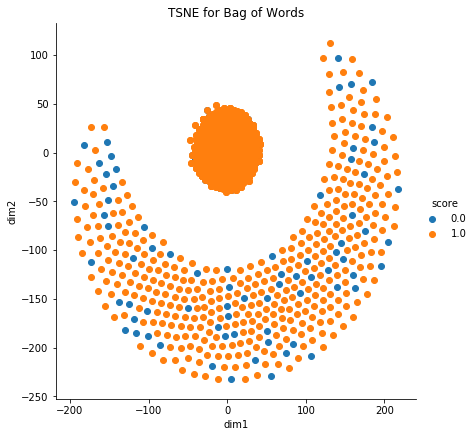

In [150]:
##https://www.kaggle.com/premvardhan/amazon-fine-food-review-tsne-visualization
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, final_df)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for Bag of Words")
plt.show()

### observation :
                    this plot seperatlt well as compare to other plots and we saw plot we can identified Approved project is more compare to rejected project.

# TSNE with `TFIDF` encoding of `project_title` feature :


In [143]:
# Standardization 
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean = False)
final_tf_idf = std.fit_transform(final_tf_idf)

In [144]:
# Converting sparse matrix to dense because tnse takes dense vector
final_tf_idf = final_tf_idf.todense()

In [145]:
print(final_tf_idf.shape)

(5000, 3881)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


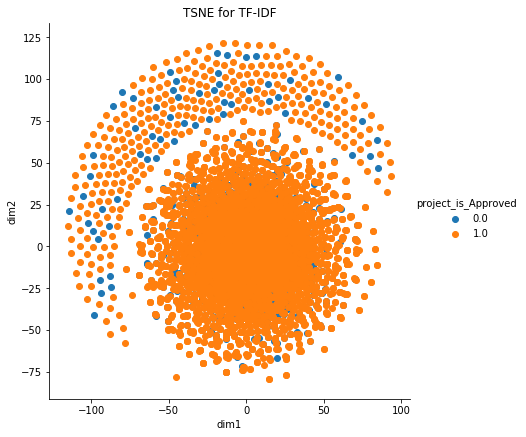

In [146]:
##https://www.kaggle.com/premvardhan/amazon-fine-food-review-tsne-visualization
from sklearn.manifold import TSNE
model = TSNE(n_components = 2, perplexity = 50)
tsne_data = model.fit_transform(final_tf_idf)

tsne_data = np.vstack((tsne_data.T,final_df)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ("dim1", "dim2", "project_is_Approved"))
sns.FacetGrid(tsne_df, hue = "project_is_Approved", size = 6).map(plt.scatter, "dim1", "dim2").add_legend()
plt.title("TSNE for TF-IDF")
plt.show()

### observation: 
                  this presentation looks like bow and it is overlapped.

# TSNE with `AVG W2V` encoding of `project_title` feature :

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


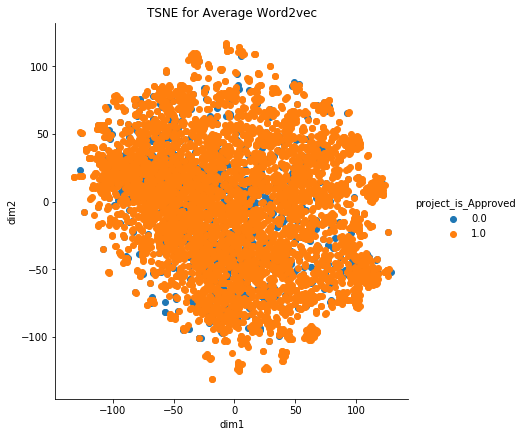

In [132]:
##https://www.kaggle.com/premvardhan/amazon-fine-food-review-tsne-visualization
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 20, n_iter = 5000)

tsne_data = model.fit_transform(avg_word2vec)

tsne_data = np.vstack((tsne_data.T,final_df)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "project_is_Approved"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="project_is_Approved", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for Average Word2vec")
plt.show()

### observation:
                    in this plot project is Approved or not both are not well seperated.they are intermixed.

#  TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature :

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


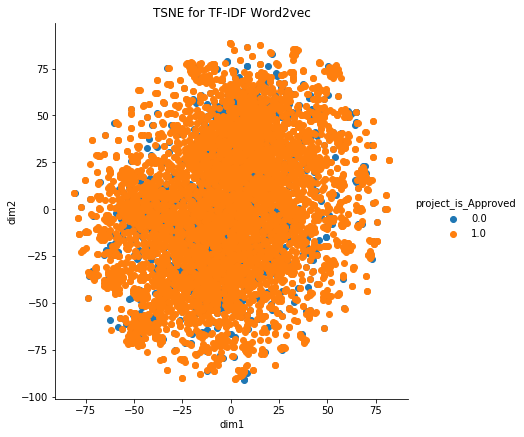

In [135]:
##https://www.kaggle.com/premvardhan/amazon-fine-food-review-tsne-visualization
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 50, n_iter = 5000)

tsne_data = model.fit_transform(tfidf_w2v_vectors)

tsne_data = np.vstack((tsne_data.T, final_df)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "project_is_Approved"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="project_is_Approved", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for TF-IDF Word2vec")
plt.show()

### observation:
                    this plot also not seperating well .

# conclusion :
                      ==> as TSNE plot gives us to better representation to Project is approved or not.
                      ==>by seen that visualization eassiy we can understand about project Approval.